In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Extending the model

**Problem statement:**

A client of the fish farm wants an aquarium containing both rainbowfish and gouramis. The client is advised that the particular kind of gouramis he wants, can get aggressive, and that they hunt and eat rainbowfish. The client is undaunted and still wants this combination. He has a budget for 20 rainbowfish, 5 gouramis and an aquarium which has a maximum capacity for 100 rainbowfish. Is it possible to have both fish in the same aquarium without one of them going extinct?

## Mathematical model

A system of two differential equations has been constructed for the rainbowfish population $P(t)$ and the gourami population $G(t)$. The gouramis are preditors and they prey on the rainbowfish.

$$
\begin{align}
\dfrac{dP}{dt} &= 0.7P(1 - \dfrac{P}{100}) - 0.04PG \quad& P(0)=20\\
\dfrac{dG}{dt} &= -0.25G + 0.008PG \quad& G(0)=5
\end{align}
$$

## Calculation (Euler's Method for systems)

For the general differential equation

$$
\dfrac{d\vec{X}}{dt} = \vec{F}\left(t,\vec{X}\right),
$$

the -th step of Euler's Method is given by

$$
\vec{X}((n+1)\Delta t) = \vec{X}(n\Delta t) + \Delta t\,\vec{F}\left(n\Delta t,\vec{X}\left(n\Delta t\right)\right),
$$

in which $\Delta t$ is some time step you have to choose.

Solution for dP/dt = 0.7*P-4*G, dG/dt = -0.55*G


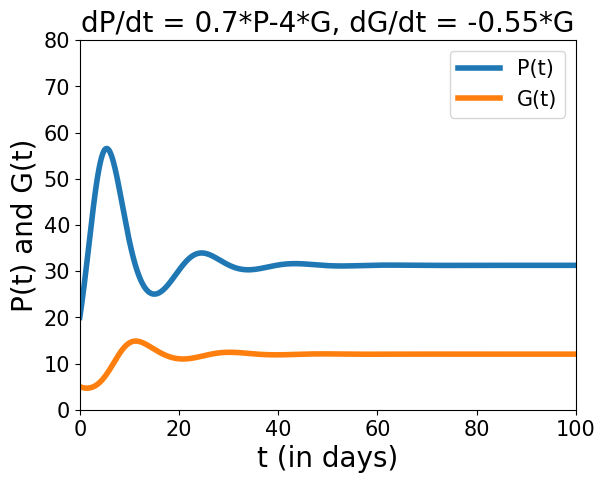

In [19]:
# Program      : Euler's method for a system
# Author       : MOOC team Mathematical Modelling Basics
# Created      : May, 2017

import numpy as np
import matplotlib.pyplot as plt

print("Solution for dP/dt = 0.7*P-4*G, dG/dt = -0.55*G") 

# Initializations

Dt = 1/8                          # timestep Delta t
P_init = 20                       # initial population of P
G_init = 5                        # initial population of G
t_init = 0                        # initial time
t_end = 100                         # stopping time

n_steps = int(round((t_end-t_init)/Dt)) # total number of timesteps

X = np.zeros(2)                   # create space for current X=[P,G]^T
dXdt = np.zeros(2)                # create space for current derivative
t_arr = np.zeros(n_steps + 1)     # create a storage array for t
X_arr = np.zeros((2,n_steps+1))   # create a storage array for X=[P,G]^T
t_arr[0] = t_init                 # add the initial t to the storage array
X_arr[0,0] = P_init               # add the initial P to the storage array
X_arr[1,0] = G_init               # add the initial G to the storage array

# Euler's method

for i in range (1, n_steps + 1):
    t = t_arr[i-1]                 # load the time
    P = X_arr[0,i-1]               # load the value of P
    G = X_arr[1,i-1]               # load the value of G
    X[0] = P                       # fill current state vector X=[P,G]^T
    X[1] = G
    dPdt = 0.7*P - 0.007*P**2 - 0.04*P*G             # calculate the derivative dP/dt
    dGdt = - 0.25*G + 0.008*P*G                # calculate the derivative dG/dt
    dXdt[0] = dPdt                 # fill derivative vector dX/dt
    dXdt[1] = dGdt         
    Xnew = X + Dt*dXdt             # calculate X on next time step
    X_arr[:,i] = Xnew              # store Xnew 
    t_arr[i] = t + Dt              # store new t-value 

# Plot the results

fig = plt.figure()
plt.plot(t_arr, X_arr[0,:], linewidth = 4, label="P(t)")  # plot P vs. time
plt.plot(t_arr, X_arr[1,:], linewidth = 4, label="G(t)")  # plot G vs. time

plt.title('dP/dt = 0.7*P-4*G, dG/dt = -0.55*G', fontsize = 20)  # set title
plt.xlabel('t (in days)', fontsize = 20)   # name of horizontal axis
plt.ylabel('P(t) and G(t)', fontsize = 20) # name of vertical axis

plt.xticks(fontsize = 15)               # adjust the fontsize
plt.yticks(fontsize = 15)               # adjust the fontsize
plt.axis([0, 100, 0, 80])                 # set the range of the axes

plt.legend(fontsize=15)                 # show the legend
plt.show()                              # necessary for some platforms

# save the figure as .jpg (other formats: png, pdf, svg, (ps, eps))
fig.savefig('Rainbowfish_Gourami.jpg', dpi=fig.dpi, bbox_inches = "tight")


In [23]:
X_arr[0,10*8], X_arr[1,10*8]

(36.50850430219906, 14.463690904121412)

The step size $1/8$ causes each of the errors to be below 1 fish. This means the time step is small enough to attain the accuracy we want.

## Calculation (phase plane)

The phase plane is in this case the $(P,G)$-plane. At any time $t$ the solutions $P$ and $G$ constitute a point $(P(t),G(t))$ in the phase plane. The collection of points $(P(t),G(t))$ for parameter $t$ in an interval form a curve in the phase plane.

A solution curve drawn in the phase plane is called a *trajectory*. If you take another initial value for $P$ and/or $G$, you obtain a different solution, and you can add its trajectory to the phase plane as well. A few trajectories in a phase plane constitute a *phase portrait* for the differential equations.

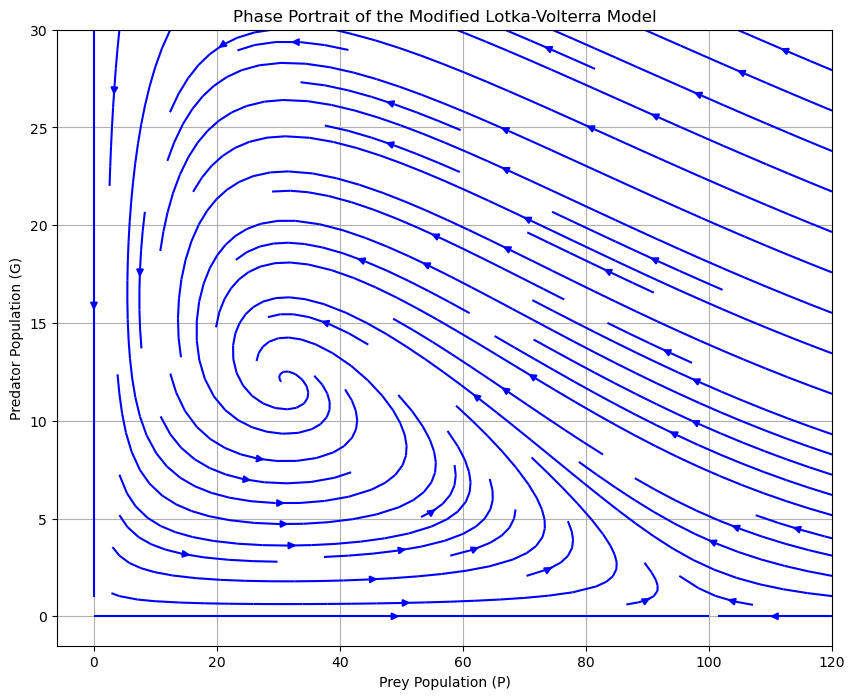

In [32]:
# Define the ranges for P (prey population) and G (predator population)
P = np.linspace(0, 120, 100)
G = np.linspace(0, 30, 100)
P, G = np.meshgrid(P, G)

# Define the differential equations
dPdt = 0.7 * P - 0.007 * P**2 - 0.04 * P * G
dGdt = -0.25 * G + 0.008 * P * G

# Plotting the phase portrait using a streamplot
fig, ax = plt.subplots(figsize=(10, 8))
ax.streamplot(P, G, dPdt, dGdt, color='blue')
ax.set_xlabel('Prey Population (P)')
ax.set_ylabel('Predator Population (G)')
ax.set_title('Phase Portrait of the Modified Lotka-Volterra Model')
plt.grid()
plt.show()

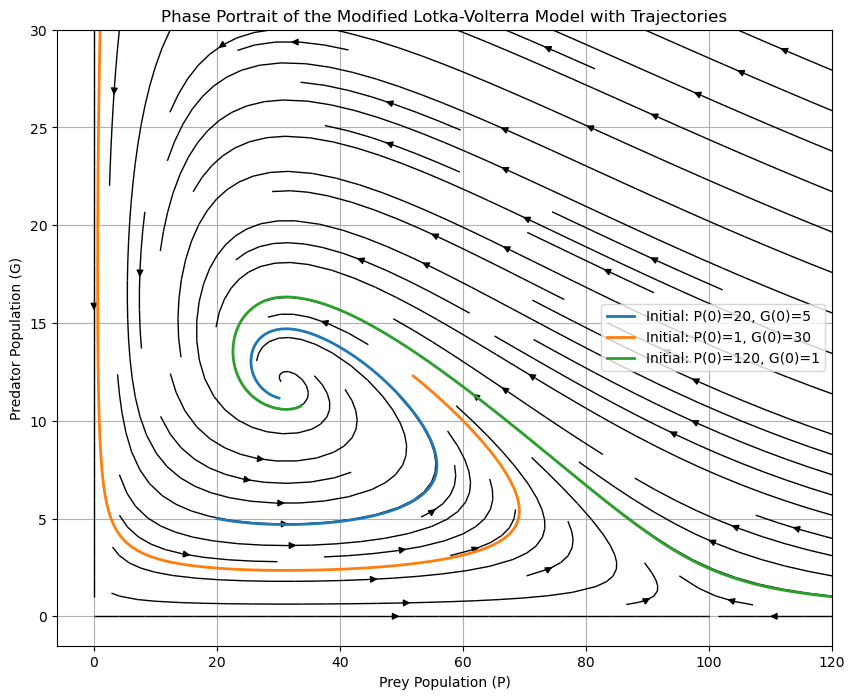

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ranges for P (prey population) and G (predator population)
P = np.linspace(0, 120, 100)
G = np.linspace(0, 30, 100)
P, G = np.meshgrid(P, G)

# Define the differential equations
def dPdt(t, Z):
    P, G = Z
    dP = 0.7 * P - 0.007 * P**2 - 0.04 * P * G
    dG = -0.25 * G + 0.008 * P * G
    return [dP, dG]

# Time span for the simulation
t_span = (0, 20)
t_eval = np.linspace(0, 20, 1000)

# Initial conditions for the trajectories
initial_conditions = [
    [20, 5],  # Initial condition 1
    [1, 30],  # Initial condition 2
    [120, 1]   # Initial condition 3
]

# Plotting the phase portrait
fig, ax = plt.subplots(figsize=(10, 8))
ax.streamplot(P, G, 0.7 * P - 0.007 * P**2 - 0.04 * P * G, -0.25 * G + 0.008 * P * G, color='black', linewidth=1)

# Solve the differential equations for each initial condition
for P0, G0 in initial_conditions:
    sol = solve_ivp(dPdt, t_span, [P0, G0], t_eval=t_eval)
    P_sol, G_sol = sol.y
    ax.plot(P_sol, G_sol, label=f'Initial: P(0)={P0}, G(0)={G0}', linewidth=2)

ax.set_xlabel('Prey Population (P)')
ax.set_ylabel('Predator Population (G)')
ax.set_title('Phase Portrait of the Modified Lotka-Volterra Model with Trajectories')
ax.legend()
ax.grid()
plt.show()


**Equilibrium points:**

For a system of differential equations, $\dfrac{d\vec{X}}{dt} = \vec{F}\left(t,\vec{X}\right)$, an equilibrium point $\vec{X}_0$ is a solution of

$$
\dfrac{d\vec{X}_0}{dt} = \vec{F}\left(t,\vec{X}_0\right) = \vec{0}.
$$

A different name for equilibrium point is *stationary point*: a point in which the dependent variables stay stationary: they will not change.

So, in our case, the equilibrium points are the points $(P,G)$ where

$$
\quad \dfrac{dP}{dt} = 0 \quad \text{and} \quad \dfrac{dG}{dt} = 0.
$$

We can rewrite the equation. That implies that:

$$
\left\{\begin{array}{rcll}\dfrac{dP}{dt} & = & 0.7\,P(t) \left( 1 -\dfrac{P(t)}{100}\,-\dfrac{0.04}{0.7}G(t) \right) &=0,\\  \dfrac{dG}{dt} & = & -0.25\,G(t) \left( 1 - \ \dfrac{0.008}{0.25}\,P(t) \right) &=0. \end{array}\right.
$$



In [47]:
import sympy as sp

# Define symbols
p, g = sp.symbols('p g')

# Define equations
eq1 = sp.Eq(0.7*p - 0.007*p**2 - 0.04*p*g, 0)
eq2 = sp.Eq(-0.25*g + 0.008*p*g, 0)

# Solve the system of equations
solution = sp.solve((eq1, eq2), (p, g))

print(solution)


[(0.0, 0.0), (31.2500000000000, 12.0312500000000), (100.000000000000, 0.0)]


## Validation

The solutions $P(t)$ and $G(t)$ are bounded, oscillating, and damped.

## Problem & Mathematical Model

**Problem statement:**

What would happen with different initial numbers of both kinds of fish? There are three equilibrium points. One is the end state. What is going to happen with the populations when we start near one of the other equilibrium points? Can we calculate some results analytically, so we can understand better how the parameters we have chosen for the model influence the results? And maybe then we have more information to choose realistic values for the parameters.

The following sections focus on stable points and steady state behaviour. The theory about this can be found in a standard textbook.

## Validation

We have worked with the system of two differential equations for the rainbowfish and gouramis.

$$
\left\{\begin{array}{rcll}\dfrac{dP}{dt} & = & 0.7\,P-0.007\,P^2-\alpha\,PG, \qquad&\text{where} \quad \alpha=0.04,\\ \dfrac{dG}{dt} & = & -0.25\,G +\beta\,PG, & \text{where} \quad \beta=0.008.\end{array}\right.
$$

You have learned in Section 3.1 how to approximate solutions numerically. In this section, we have used analytical methods to characterize the solutions beforehand. First the equilibrium points  were calculated:

$$
(0,0),\ (100,0) \ \text{ and} \ \left(\dfrac{1}{4\beta}, \dfrac{0.7}{\alpha}(1-\dfrac{1}{400\beta} )\right).
$$

Then the differential equations were linearised around the three equilibrium points:

$$
\text{For}\quad \vec{M}(t)= \left[\begin{array}{c}P(t)-P_0\\G(t)-G_0\end{array}\right], \\
\dfrac{d\vec{M}}{dt}\,\approx\,  \left[\begin{array}{cc}0.7-0.014P_0-\alpha G_0&-\alpha P_0\\\beta G_0 & -0.25+\beta P_0\\ \end{array}\right]   \,\vec{M}(t).
$$

By calculating the eigenvalues of the three matrices, the types of the three equilibrium points were determined.

The three equilibrium points were calculated analytically. Could you have found the coordinates (up to say 5 decimals) of all three of them by just simulating with Euler's Method?

No, because there is only one stable equilibrium point, and in this case the solutions are bounded, all solutions will end up in that stable equilibrium point. The unstable equilibrium points can only be found when you would accidentally start exactly in them, and even then, even the tiniest numerical error, will make that the solution leaves the equilibrium point.

TODO: I am not sure I understand the bounded part.